In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read PF data
num_data = 100

num_branches = 186

nt = 12

file_path = f'../PF/sample_{1}.csv'
all_PF = pd.read_csv(file_path, header=None, index_col=None)

for i in range(1, num_data):
    file_path = f'../PF/sample_{i+1}.csv'
    try:
        PF = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    except FileNotFoundError:
        print(f'File sample_{i+1}.csv is not found.')
        continue
    all_PF = np.concatenate([all_PF, PF], axis=1)

In [3]:
# Get max of PF
PF_max = np.abs(all_PF).max(axis=1)

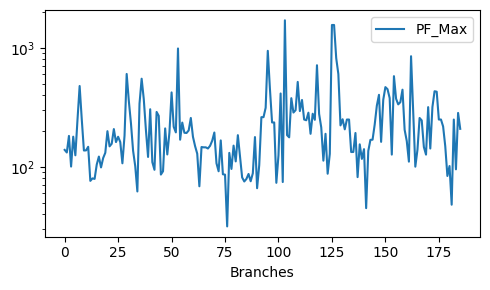

In [4]:
# Plot min, median and max of PF
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.plot(PF_max, label='PF_Max')
ax.set_yscale('log')
# ax.set_ylim((0, 600))
ax.set_xlabel('Branches')
ax.legend()

# fig.savefig('PF_max.jpg')

plt.tight_layout()
plt.show()
plt.close('all')

In [5]:
# Select three categories of PF_Max
bidx1 = PF_max <= 200
bidx2 = (PF_max > 200) & (PF_max <= 500)
bidx3 = PF_max > 500

In [6]:
bidx1.shape, bidx2.shape, bidx3.shape

((186,), (186,), (186,))

In [7]:
bidx1.sum(), bidx2.sum(), bidx3.sum()

(106, 67, 13)

In [8]:
pd.DataFrame(bidx1.astype(float)).to_csv('../../branch_params/PF_max_category1.csv', header=None, index=None, columns=None)
pd.DataFrame(bidx2.astype(float)).to_csv('../../branch_params/PF_max_category2.csv', header=None, index=None, columns=None)
pd.DataFrame(bidx3.astype(float)).to_csv('../../branch_params/PF_max_category3.csv', header=None, index=None, columns=None)